<a href="https://colab.research.google.com/github/Yasir323/lazy-import/blob/main/Lazy_Import_and_Pyforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
SEED = 42

## Lets look for some appropriate datasets first

In [3]:
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [5]:
reg_data = sns.load_dataset('anscombe')
reg_data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


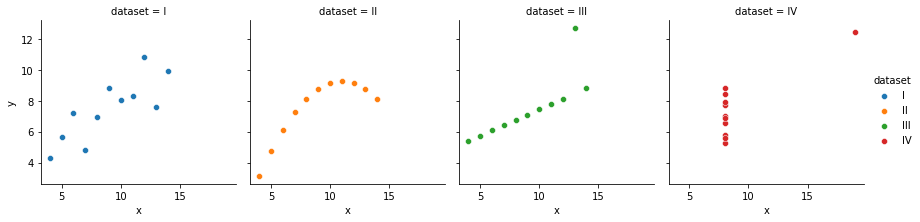

In [6]:
# Lets plot the data first
g = sns.FacetGrid(reg_data, col="dataset", hue="dataset")
g.map_dataframe(sns.scatterplot, x="x", y="y")
g.set_axis_labels("x", "y")
g.add_legend()

In [7]:
# Lets pick a dataset for classification as well
clas_data = sns.load_dataset('titanic')
clas_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Importing everything with just one line

In [8]:
!pip install pyforest

In [9]:
import pyforest as pf

In [10]:
# Lets check what has actually been imported for us
pf.lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.manifold import TSNE',
 'import pickle',
 'import awswrangler as wr',
 'import plotly as py',
 'import keras',
 'import gensim',
 'import re',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from pyspark import SparkContext',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import altair as alt',
 'import plotly.graph_objs as go',
 'import os',
 'import seaborn as sns',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn import svm',
 'import bokeh',
 'import nltk',
 'import glob',
 'import matplotlib.pyplot as plt',
 'import numpy as np',
 'from sklearn.preprocessing import OneHotEncoder',
 'import spacy',
 'import lightgbm as lgb',
 'import statistics',
 'import plotly.express as px',
 'import xgboost as xgb',
 'import tensorflow as tf',
 'import sklearn',
 'import dash',
 'import pandas as pd',
 'from pathlib import Path',
 '

Although its quite wasteful to import so many libraries, most of which we'll not even use. But its good to know that we can do this and `pyforest` is actually importing these libraries using the most commonly used aliases which is a good feature to have.

# Classification Problem

In [11]:
clas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [12]:
# Train test val split
train, validate, test = np.split(
     clas_data.sample(frac=1, random_state=SEED),
     [int(.7*len(clas_data)), int(.85*len(clas_data))]
)

<IPython.core.display.Javascript object>

In [13]:
train.shape[0], validate.shape[0], test.shape[0]

(623, 134, 134)

In [14]:
y_train = train.survived
X_train = train.drop('survived', axis=1)
y_train.shape

(623,)

In [15]:
y_val = validate.survived
X_val = validate.drop('survived', axis=1)

In [16]:
y_test = test.survived
X_test = test.drop('survived', axis=1)

We might wanna do some feature engineering if we are to compare all the models because some don't work well with missing values, some with categorical variables and so on...

In [17]:
dfs = [X_train, X_val, X_test]
df_names = ['Training set', 'Validation set', 'Test set']

## Missing values

In [18]:
def display_missing(df):    
    for col in df.columns.tolist():
        print('{}: {}'.format(col, df[col].isnull().sum()))
    print()

In [19]:
print('Missing Values')
print('-'*50)
for df, df_name in zip(dfs, df_names):
    print('{}'.format(df_name))
    display_missing(df)

Missing Values
--------------------------------------------------
Training set
pclass: 0
sex: 0
age: 129
sibsp: 0
parch: 0
fare: 0
embarked: 2
class: 0
who: 0
adult_male: 0
deck: 487
embark_town: 2
alive: 0
alone: 0

Validation set
pclass: 0
sex: 0
age: 25
sibsp: 0
parch: 0
fare: 0
embarked: 0
class: 0
who: 0
adult_male: 0
deck: 104
embark_town: 0
alive: 0
alone: 0

Test set
pclass: 0
sex: 0
age: 23
sibsp: 0
parch: 0
fare: 0
embarked: 0
class: 0
who: 0
adult_male: 0
deck: 97
embark_town: 0
alive: 0
alone: 0



Missing values in Age are filled with median age, but using median age of the whole data set is not a good choice. Median age of Pclass groups is the best choice because of its high correlation with Age.

In [20]:
df_all = pd.concat([X_train, X_val, X_test], sort=True).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [21]:
df_all_corr = clas_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

In [22]:
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

In [23]:
print(df_all_corr[df_all_corr['Feature 1'] == 'age'])

   Feature 1   Feature 2  Correlation Coefficient
3        age         age                 1.000000
21       age      pclass                 0.369226
26       age       sibsp                 0.308247
28       age  adult_male                 0.280328
41       age       alone                 0.198270
42       age       parch                 0.189119
50       age        fare                 0.096067
58       age    survived                 0.077221


In order to be more accurate, Sex feature is used as the second level of groupby while filling the missing Age values.

In [24]:
age_by_pclass_sex = clas_data.groupby(['sex', 'pclass']).median()['age']

In [25]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [26]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['sex', 'pclass'])['age'].apply(lambda x: x.fillna(x.median()))

In [27]:
clas_data[clas_data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't necessarily mean that they embarked from that port.

In [28]:
df_all['embarked'] = df_all['embarked'].fillna('C')

In [29]:
clas_data[clas_data['fare'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [30]:
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

In [52]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    print(df_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    print(pclass3)
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='green', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='blue', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='red', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()

In [53]:
df_all_decks = clas_data.groupby(['deck', 'pclass']).count()

In [54]:
df_all_decks

survived   sex   age  sibsp  ...  adult_male  embark_town  alive  alone
deck pclass                               ...                                       
A    1           15.0  15.0  12.0   15.0  ...        15.0         15.0   15.0   15.0
     2            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     3            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
B    1           47.0  47.0  45.0   47.0  ...        47.0         45.0   47.0   47.0
     2            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     3            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
C    1           59.0  59.0  51.0   59.0  ...        59.0         59.0   59.0   59.0
     2            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     3            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
D    1           29.0  29.0  27.0   29.0  ...        29.0         29.0   29.0   29.0
     2            4.0   4.0   4.0    4.0  ...         4.0          4.0    4.0    4.0
     3            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
E    1           25.0  25.0  24.0   25.0  ...        25.0         25.0   25.0   25.0
     2            4.0   4.0   3.0    4.0  ...         4.0          4.0    4.0    4.0
     3            3.0   3.0   3.0    3.0  ...         3.0          3.0    3.0    3.0
F    1            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     2            8.0   8.0   8.0    8.0  ...         8.0          8.0    8.0    8.0
     3            5.0   5.0   3.0    5.0  ...         5.0          5.0    5.0    5.0
G    1            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     2            NaN   NaN   NaN    NaN  ...         NaN          NaN    NaN    NaN
     3            4.0   4.0   4.0    4.0  ...         4.0          4.0    4.0    4.0

[21 rows x 13 columns]

In [55]:
df_all_decks = df_all_decks.drop(columns=['sex', 'age', 'sibsp', 'parch', 'class',
                                                                        'fare', 'embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone'])

In [56]:
df_all_decks = df_all_decks.rename(columns={'survived': 'Count'}).transpose()

In [57]:
df_all_decks

deck       A             B             C  ...    E   F             G         
pclass     1   2   3     1   2   3     1  ...    3   1    2    3   1   2    3
Count   15.0 NaN NaN  47.0 NaN NaN  59.0  ...  3.0 NaN  8.0  5.0 NaN NaN  4.0

[1 rows x 21 columns]

In [58]:
all_deck_count, all_deck_perc = get_pclass_dist(df_all_decks)

<IPython.core.display.Javascript object>

In [59]:
all_deck_perc

{'A': [100.0, nan, nan],
 'B': [100.0, nan, nan],
 'C': [100.0, nan, nan],
 'D': [87.87878787878788, 12.121212121212121, nan],
 'E': [78.125, 12.5, 9.375],
 'F': [nan, 61.53846153846154, 38.46153846153847],
 'G': [nan, nan, 100.0]}

<IPython.core.display.Javascript object>

            0          1           2
A  100.000000        NaN         NaN
B  100.000000        NaN         NaN
C  100.000000        NaN         NaN
D   87.878788  12.121212         NaN
E   78.125000  12.500000    9.375000
F         NaN  61.538462   38.461538
G         NaN        NaN  100.000000


<IPython.core.display.Javascript object>

A           NaN
B           NaN
C           NaN
D           NaN
E      9.375000
F     38.461538
G    100.000000
Name: 2, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

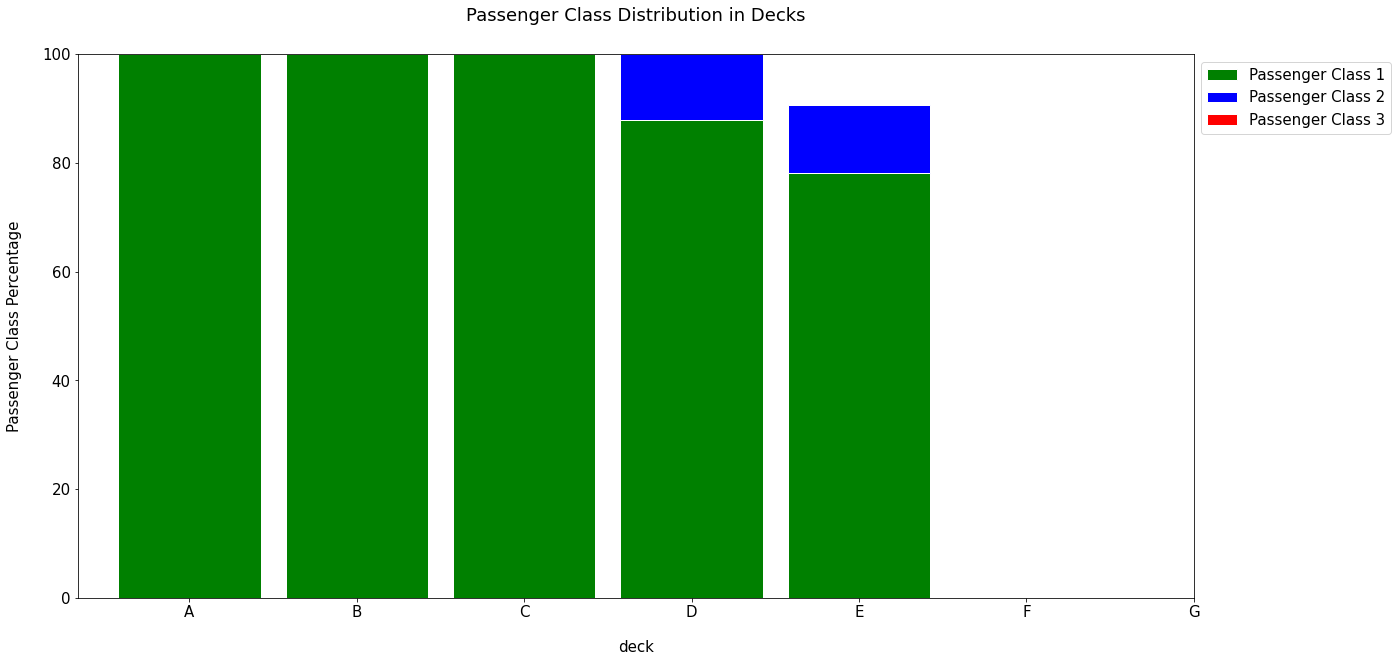

In [60]:
display_pclass_dist(all_deck_perc)

In [61]:
clas_data.groupby(['pclass'])['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

In [ ]:
clas_data.groupby(['deck'])['pclass'].count()